# Binary Classification Model

This notebook demonstrates a simple example of binary classification using a neural network built with TensorFlow/Keras.  
The model learns to distinguish between two classes: `0` and `1`.


# Imports and loading data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [2]:
X = np.load("data/X.npy")[0:1000]
y = np.load("data/y.npy")[0:1000]

In [3]:
print(X.shape)
print(y.shape)

(1000, 400)
(1000, 1)


# Visualizing the data

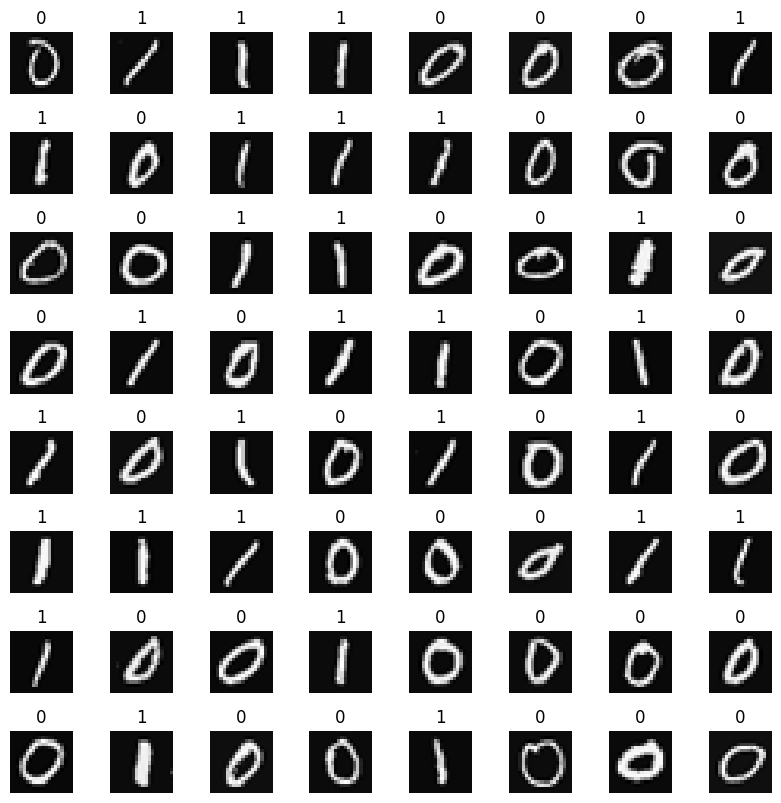

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Model definition and training

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test  = x_test.reshape(x_test.shape[0], -1) / 255.0

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.6911 - val_accuracy: 0.9850 - val_loss: 0.6817
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.6740 - val_accuracy: 0.9900 - val_loss: 0.6393
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9880 - loss: 0.6203 - val_accuracy: 0.9750 - val_loss: 0.5540
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9770 - loss: 0.5236 - val_accuracy: 0.9900 - val_loss: 0.4273
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9859 - loss: 0.3988 - val_accuracy: 0.9900 - val_loss: 0.3006
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9870 - loss: 0.2726 - val_accuracy: 0.9900 - val_loss: 0.2018
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9882 - loss: 0.1848 - val_accuracy: 0.9900 - val_loss: 0.1380
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9978 - loss: 0.1239 - val_accuracy: 0.9900

# Evaluation

In [10]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test accuracy: {acc*100:.2f}%")


✅ Test accuracy: 99.50%


In [11]:
n_samples = 8
indices = np.random.choice(len(x_test), n_samples)
images = x_test[indices].reshape(-1, 20, 20)
labels = y_test[indices]
preds = (model.predict(x_test[indices]) > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


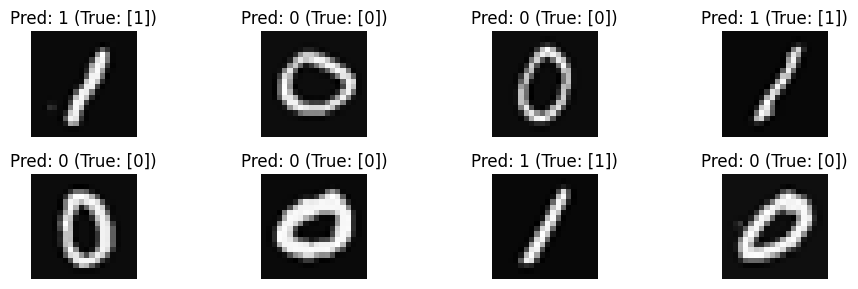

In [12]:
plt.figure(figsize=(10,3))
for i in range(n_samples):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i].T, cmap='gray')
    plt.title(f"Pred: {preds[i]} (True: {labels[i]})")
    plt.axis('off')
plt.tight_layout()
plt.show()